In [75]:
import pandas as pd
import numpy as np
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

def isSupport(df, i):
  support = df['Low'][i] < df['Low'][i-1]  and df['Low'][i] < df['Low'][i+1] and df['Low'][i+1] < df['Low'][i+2] and df['Low'][i-1] < df['Low'][i-2]
  return support

def isResistance(df, i):
  resistance = df['High'][i] > df['High'][i-1]  and df['High'][i] > df['High'][i+1] and df['High'][i+1] > df['High'][i+2] and df['High'][i-1] > df['High'][i-2]
  return resistance

In [76]:
name = 'TQQQ'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="2m", start="2021-09-25", end="2021-09-29")

df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
df.head()

,Date,Open,High,Low,Close
Datetime,,,,,
2021-09-27 09:30:00-04:00,18897.562500,138.210007,138.960007,137.972000,138.850006
2021-09-27 09:32:00-04:00,18897.563889,138.850006,138.990005,137.520004,137.570007
2021-09-27 09:34:00-04:00,18897.565278,137.250000,137.309998,136.895004,136.979202
2021-09-27 09:36:00-04:00,18897.566667,137.250000,137.419998,136.320007,136.320007
2021-09-27 09:38:00-04:00,18897.568056,136.250000,136.520004,135.975006,136.330002


In [77]:
def toDate(i):
    return str(df.index[i]).split(" ")[0]

In [78]:
levels = []
for i in range(2, df.shape[0]-2):
  if isSupport(df,i):
    levels.append((i,df['Low'][i], toDate(i)))
  elif isResistance(df,i):
    levels.append((i,df['High'][i], toDate(i)))

/var/folders/nd/5pqh5k_9627gj29t_mn4n73m0000gn/T/ipykernel_13187/1662963769.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


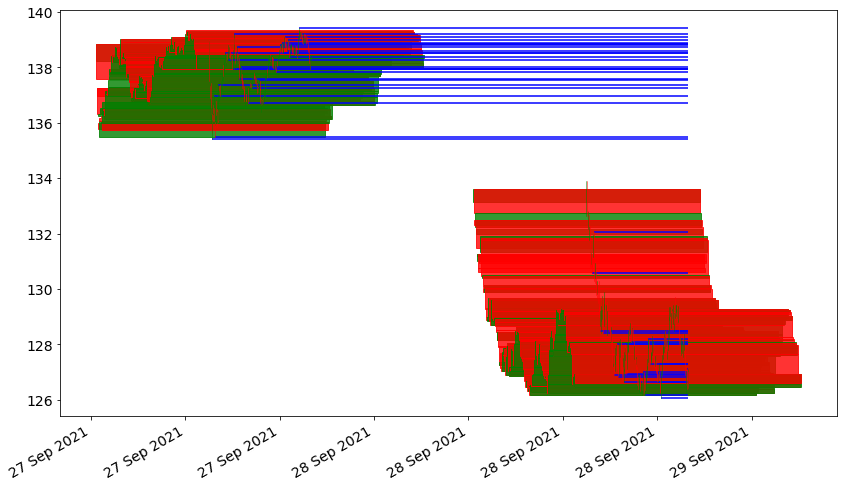

In [79]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

def plot_all():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax,df.values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()
  for level in levels:
    plt.hlines(level[1],xmin=df['Date'][level[0]],\
               xmax=max(df['Date']),colors='blue')
  fig.show()

plot_all()

In [69]:
levels

[]

In [ ]:
print("done")